In [1]:
import sys

import matplotlib.pyplot as plt
import json

import dysts
from dysts.flows import *
from dysts.base import *
from dysts.utils import *
from dysts.analysis import *

%load_ext autoreload
%autoreload 2

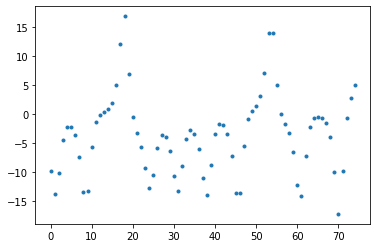

In [13]:
eq = Lorenz()
num_periods = 5
pts_per_period=15
sol = eq.make_trajectory(num_periods * pts_per_period, pts_per_period=pts_per_period, resample=True)
plt.plot(sol[:, 0], '.')

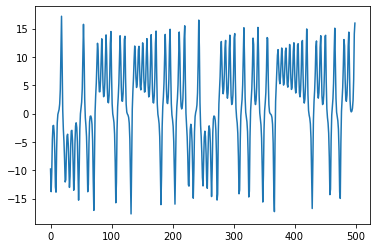

In [15]:
dataset = dict()
dataset["Te"] = dict()



In [ ]:
def load_data():
    # look up metadata

In [3]:

TRAIN = 5000
TEST = 1000
pts_per_period = 15 # granularity

dataset = dict()

for i, name in enumerate(get_attractor_list()):
    print(name)
    dataset[name] = dict()
    model = getattr(dysts.flows, name)()
    print(item, ": ", end="")
    
#     current_fields = list(data.keys())

    # make initial conditions for train, val, test
    
    sol = eq.make_trajectory(num_periods * pts_per_period, pts_per_period=pts_per_period, resample=True)
    
    # record name and points per period
    # how to pick random initial conditions?
    
    
    dataset[name]["index_in_csv"]

Aizawa
AnishchenkoAstakhov
Arneodo
ArnoldBeltramiChildress
ArnoldWeb
BeerRNN
BelousovZhabotinsky
BickleyJet
Blasius
BlinkingRotlet
BlinkingVortex
Bouali
Bouali2
BurkeShaw
CaTwoPlus
CaTwoPlusQuasiperiodic
CellCycle
CellularNeuralNetwork
Chen
ChenLee
Chua
CircadianRhythm
CoevolvingPredatorPrey
Colpitts
Coullet
Dadras
DequanLi
DoubleGyre
DoublePendulum
Duffing
ExcitableCell
Finance
FluidTrampoline
ForcedBrusselator
ForcedFitzHughNagumo
ForcedVanDerPol
GenesioTesi
GuckenheimerHolmes
Hadley
Halvorsen
HastingsPowell
HenonHeiles
HindmarshRose
Hopfield
HyperRossler
IkedaDelay
IsothermalChemical
ItikBanksTumor
JerkCircuit
KawczynskiStrizhak
Laser
LiuChen
Lorenz
Lorenz84
Lorenz96
LorenzBounded
LorenzCoupled
LuChen
LuChenCheng
MacArthur
MackeyGlass
MooreSpiegel
MultiChua
NewtonLiepnik
NoseHoover
NuclearQuadrupole
OscillatingFlow
PanXuZhou
PehlivanWei
PiecewiseCircuit
QiChen
RabinovichFabrikant
RayleighBenard
RikitakeDynamo
Rossler
Rucklidge
Sakarya
SaltonSea
SanUmSrisuchinwong
ScrollDelay
Shimizu

In [ ]:
with open(INPUT_FILE, "r") as file:
    data = json.load(file)
print(f"Total models being analyzed is {len(data.keys())}.")

for i, item in enumerate(list(data.keys())):

In [ ]:
DATASET_PATH = ""
RESULTS_PATH = ""